# News Trends

### 정원(20214772)

In [16]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [17]:
query = {
  "query": {
    "match": {
      "title": "부동산"
    }
  },
  "size": 0,
  "aggs": {
    "group_by_date":{
      "date_histogram":{
        "field": "created_at",
        "interval": "day"
      }
    }
  }
}

In [18]:
query = json.dumps(query)

In [19]:
headers = {
    'Content-Type': 'application/json'
}

In [20]:
resp = requests.get(
    f'{ELASTICSEARCH_URL}/news/_search',
    headers=headers,
    data = query,
    auth = ELASTICSEARCH_AUTH    
)

In [21]:
resp.status_code

200

In [22]:
results = resp.json()

In [23]:
buckets = results['aggregations']['group_by_date']['buckets']

In [24]:
df = pd.DataFrame(buckets)

In [25]:
df['date'] = pd.to_datetime(df['key_as_string'])

In [26]:
df = df.set_index('date')

In [27]:
df

,key_as_string,key,doc_count
date,,,
2022-08-01 00:00:00+00:00,2022-08-01T00:00:00.000Z,1659312000000,22
2022-08-02 00:00:00+00:00,2022-08-02T00:00:00.000Z,1659398400000,34
2022-08-03 00:00:00+00:00,2022-08-03T00:00:00.000Z,1659484800000,48
2022-08-04 00:00:00+00:00,2022-08-04T00:00:00.000Z,1659571200000,1
2022-08-05 00:00:00+00:00,2022-08-05T00:00:00.000Z,1659657600000,0
2022-08-06 00:00:00+00:00,2022-08-06T00:00:00.000Z,1659744000000,0
2022-08-07 00:00:00+00:00,2022-08-07T00:00:00.000Z,1659830400000,0
2022-08-08 00:00:00+00:00,2022-08-08T00:00:00.000Z,1659916800000,1
2022-08-09 00:00:00+00:00,2022-08-09T00:00:00.000Z,1660003200000,0


In [28]:
plt.rcParams['figure.figsize'] = (10, 4)

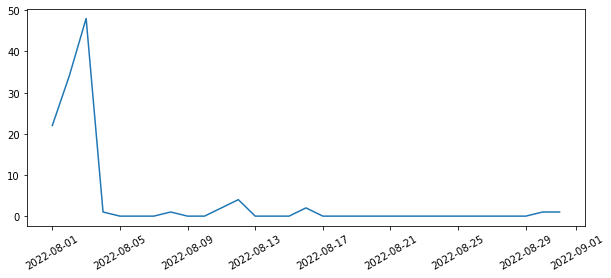

In [29]:
plt.plot(df['doc_count'])
plt.xticks(rotation=30)
plt.show()